In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/edit#gid=1187587451'
url = url.replace('/edit#gid=', '/export?format=csv&gid=')

patient = pd.read_csv(url, header=1, index_col=0)

In [4]:
patient

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,...,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,...,12/29/2019,1/4/2020,NaN,1.0,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,...,NaN,1/12/2020,NaN,0.0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,...,NaN,1/3/2020,NaN,0.0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,...,NaN,NaN,NaN,1.0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,...,NaN,NaN,NaN,0.0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,6.0,2/27/2020,new COVID-19 patient confirmed in Switzerland:...,Aargau,Switzerland,male,26.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0,0,NaN,The Local,https://www.thelocal.ch/20200304/swiss-health-...
2700,7.0,2/27/2020,new COVID-19 patient confirmed in Switzerland:...,Zurich,Switzerland,female,30.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0,0,NaN,The Local,https://www.thelocal.ch/20200304/swiss-health-...
2701,8.0,2/27/2020,new COVID-19 patient confirmed in Switzerland:...,Vaud,Switzerland,male,49.0,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0,0,NaN,The Local,https://www.thelocal.ch/20200304/swiss-health-...


In [5]:
# Gender differences
patient.gender.value_counts()  

male      855
female    669
Name: gender, dtype: int64

In [6]:
# Percentage of gender differences
patient.gender.value_counts(normalize=True).round(2) 

male      0.56
female    0.44
Name: gender, dtype: float64

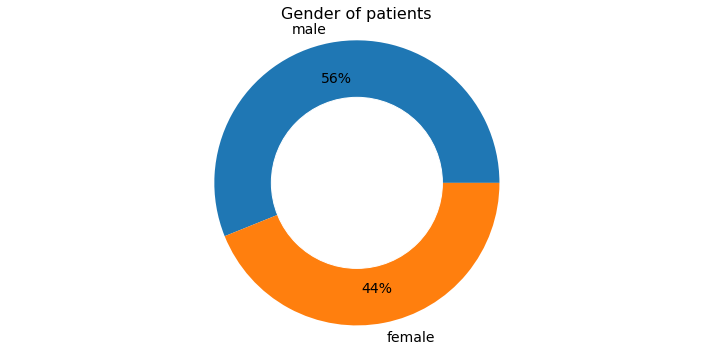

In [7]:
cc = patient['gender'].value_counts().plot(kind='pie', figsize=(10,5), autopct="%.0f%%", pctdistance = 0.75, textprops={'fontsize': 14})

cc.set_title('Gender of patients', fontsize=16)
cc.set_ylabel('')
circle = plt.Circle((0,0), 0.6, color='white')
cc.add_artist(circle)
plt.axis('equal')
plt.tight_layout()

Text(0.5, 0, 'age')

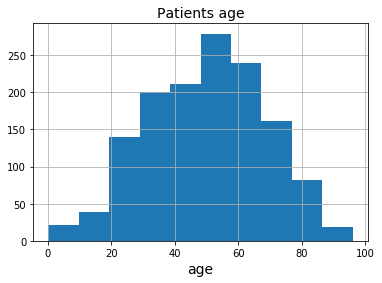

In [8]:
# Histogramm Patients age
ax1 = patient.age.hist()
ax1.set_title('Patients age', fontsize=14)
plt.xlabel('age', fontsize=14)


In [9]:
# Patients age in average
patient.age.mean()

#RESULT: The average age of the patient 50 years.

50.76689432063264

In [10]:
# Min/max patients age
db = patient.groupby(["gender"]).agg({'age':[min,max]})
db

age      
        min   max
gender           
female  2.0  96.0
male    0.5  95.0

In [13]:
patient.age[patient.age.between(0,12)].value_counts()

5.00     5
12.00    4
8.00     3
9.00     3
2.00     3
11.00    2
4.00     2
0.25     1
3.00     1
6.00     1
1.00     1
0.50     1
Name: age, dtype: int64

In [14]:
age_less_12 = patient.age[patient.age.between(0,12)].count()
age_less_12

27

In [15]:
age_13_18 = patient.age[patient.age.between(13,18)].count()
age_13_18 

24

In [16]:
age_19_49 = patient.age[patient.age.between(19,49)].count()
age_19_49

577

In [17]:
age_50_60 = patient.age[patient.age.between(50,60)].count()
age_50_60

315

In [18]:
age_more_61 = patient.age[patient.age.between(61,110)].count()
age_more_61

448

In [19]:
patient.age.max()

96.0

In [20]:
# The number of cases by group
d3 = [{"age_less_12": age_less_12, "age_13_18": age_13_18, 'age_19_49':age_19_49, 'age_50_60':age_50_60,'age_more_61':age_more_61}]
df3 = pd.DataFrame(d3)
print(df3)


   age_less_12  age_13_18  age_19_49  age_50_60  age_more_61
0           27         24        577        315          448


Text(0.5, 1.0, 'The number of cases by age')

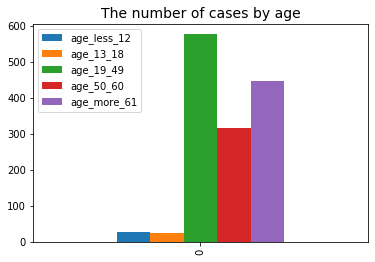

In [22]:
# Plot "The number of cases by group"
df3.plot(kind='bar');
plt.title('The number of cases by age', fontsize=14)


In [23]:
# Death Rate by age groups

# Death Rate = (number of deaths / number of cases) = probability of dying if infected by the virus (%). 

#This probability differs depending on the age group. The percentages shown below do not have to add up to 100%, 
#as they do NOT represent share of deaths by age group. Rather, it represents, for a person in a given age group, 
#the risk of dying if infected with COVID-19.


# Death Rate 0-12 years
death_age_less_12 = patient[patient.age.between(0,12)].death.count()
death_age_less_12

25

In [24]:
patient.summary.count()

2698

In [25]:
# Death rate for age 0-12 years

#from decimal import Decimal, ROUND_UP
#Decimal(str(death_age_less_12/patient.summary.count())).quantize(Decimal('.01'), rounding=ROUND_UP)
death_rate_age_less_12 = death_age_less_12/patient.summary.count()
round(death_rate_age_less_12,2)


0.01

In [26]:
# Death in 13-18 years
death_age_13_18 = patient[patient.age.between(13,18)].death.count()
death_age_13_18

20

In [27]:
# Death rate for age 13-18 years
death_rate_age_13_18 = death_age_13_18/patient.summary.count()
round(death_rate_age_13_18,2)

0.01

In [28]:
#Death in 19-49 years 

death_age_19_49 = patient[patient.age.between(19,49)].death.count()
death_age_19_49


501

In [29]:
# Death rate for age 19-49 years
death_rate_age_19_49 = death_age_19_49/patient.summary.count()
round(death_rate_age_19_49,2)

0.19

In [30]:
#Death in 50-60 years 

death_age_50_60 = patient[patient.age.between(50,60)].death.count()
death_age_50_60

267

In [31]:
# Death rate for age 50-60 years
death_rate_age_50_60 = death_age_50_60/patient.summary.count()
round(death_rate_age_50_60,2)

0.1

In [33]:
#Death in 60+ years 

death_age_more_60 = patient[patient.age.between(60,110)].death.count()
death_age_more_60

376

In [34]:
# Death rate for age 60+ 
death_rate_age_more_60 = death_age_more_60/patient.summary.count()
round(death_rate_age_more_60,2)

0.14

In [35]:
# Death rate all cases by age
d4 = [{"death_rate_age_less_12": death_rate_age_less_12, "death_rate_age_13_18": death_rate_age_13_18, 'death_rate_age_19_49':death_rate_age_19_49, 'death_rate_age_50_60':death_rate_age_50_60,'death_rate_age_more_60':death_rate_age_more_60}]
df4 = pd.DataFrame(d4)
df4

,death_rate_age_less_12,death_rate_age_13_18,death_rate_age_19_49,death_rate_age_50_60,death_rate_age_more_60
0,0.009266,0.007413,0.185693,0.098962,0.139362


Text(0.5, 0, 'age')

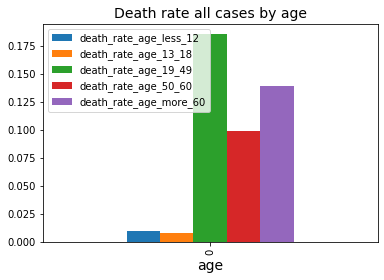

In [38]:
# Plot "Death rate all cases by age"
df4.plot(kind='bar');
plt.title('Death rate all cases by age', fontsize=14)
plt.xlabel('age', fontsize=14)

#RESULT: The highest mortality in the group is 19-49 years. Relatively few cases are seen among children untill 18 years.